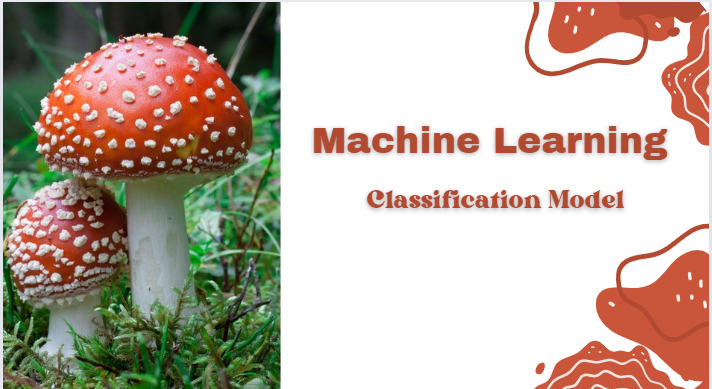

# Objective:
The goal of this project is to classify mushrooms as edible or poisonous based on their features.

# Importing Libraries

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Loading and Inspecting the Data

In [ ]:
# importing data
df=pd.read_csv('/content/drive/MyDrive/ML Project/mushrooms.csv')

In [ ]:
# No of rows and columns
df.shape

(8124, 23)

In [ ]:
# top 5 data
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


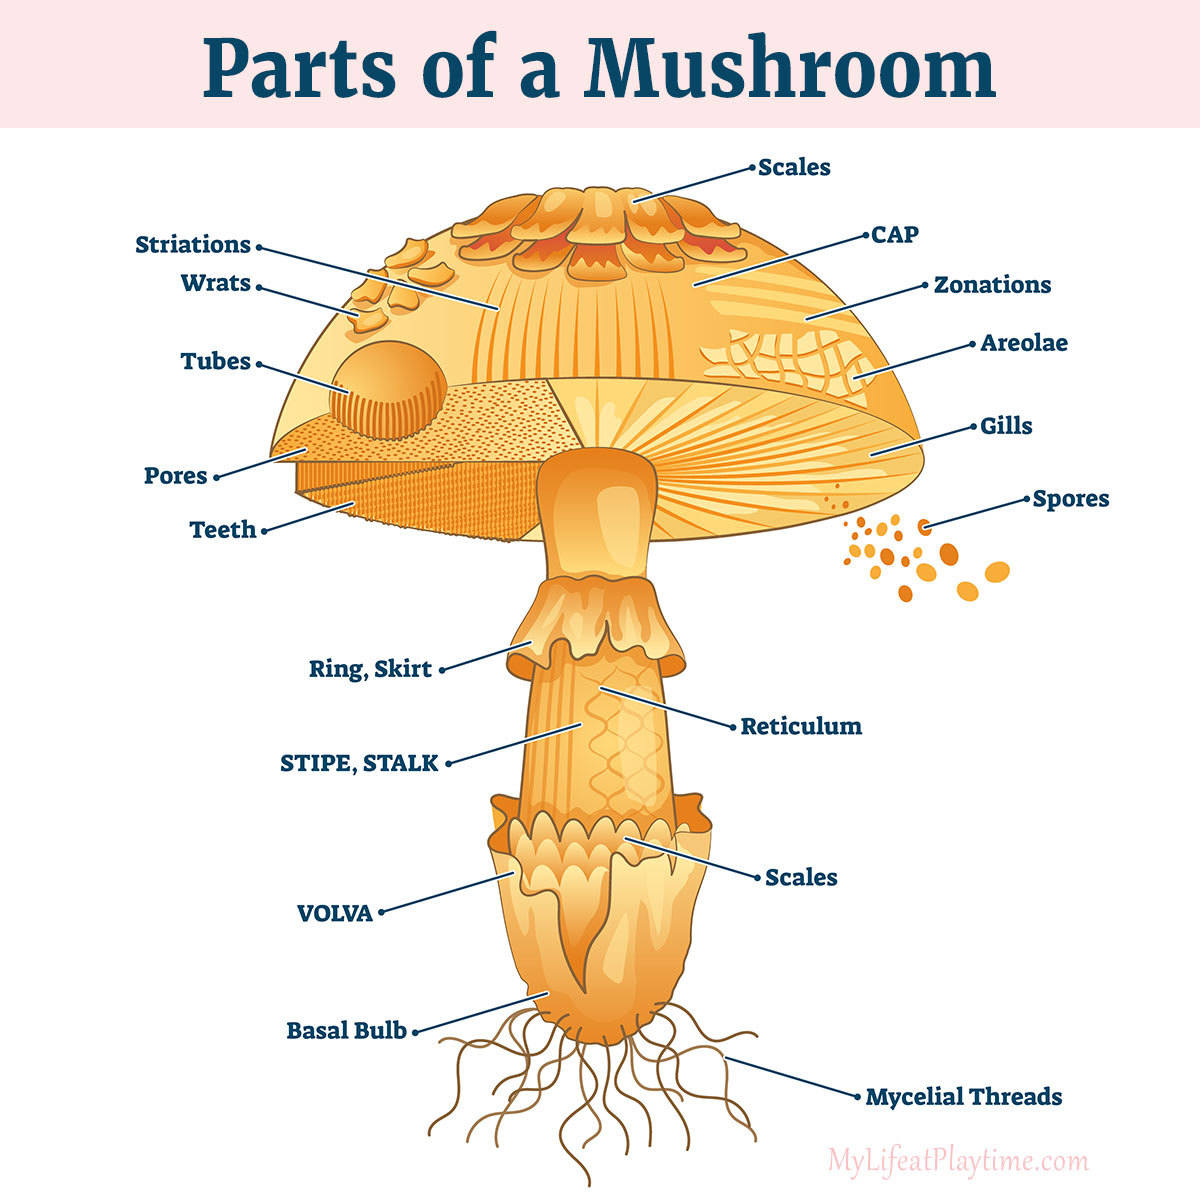

# Data Cleaning
## Checking and Visualizing Null Values

In [ ]:
# Checking Null Values
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
df.dtypes

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


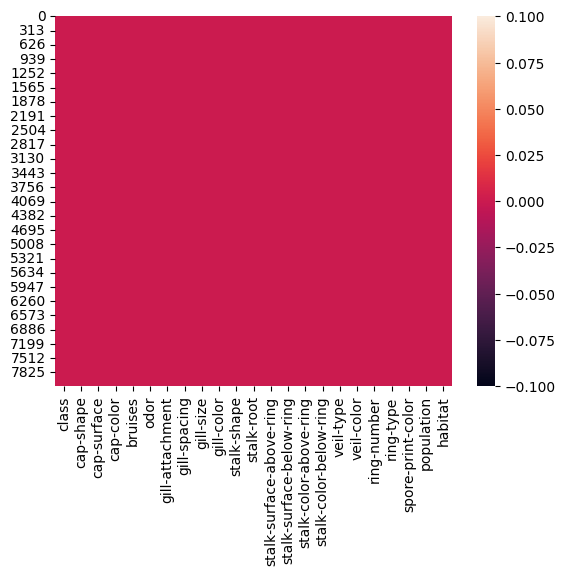

In [ ]:
# Visualising Null Values
sb.heatmap(df.isnull())
plt.show()

In [ ]:
# checking Duplicate Values
df.duplicated().sum()

0

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Label_encoders={}
for i in df.columns:
    le= LabelEncoder()
    df[i] = le.fit_transform(df[i])
    Label_encoders[i]=le

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# EDA (Exploratory Data Analysis)

## Dataset Information and Statistics

In [ ]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [ ]:
# statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
# no of elements in class column
df['class'].value_counts()

,count
class,
0,4208
1,3916


## Data Visualization

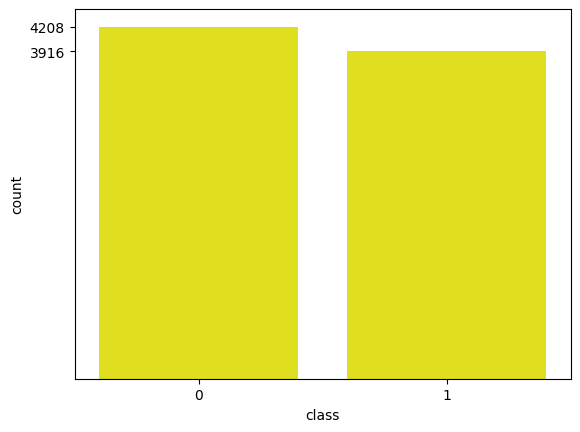

In [ ]:

f=df['class'].value_counts() #Frequency
sb.countplot(data=df,x='class',color='yellow')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()


classes: edible=e, poisonous=p

In [ ]:
df['cap-shape'].value_counts()

,count
cap-shape,
5,3656
2,3152
3,828
0,452
4,32
1,4


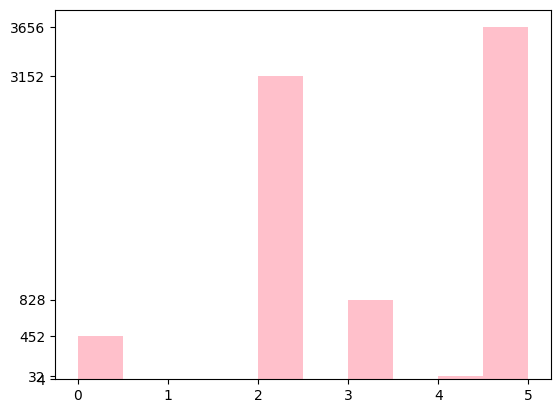

In [ ]:
f=df['cap-shape'].value_counts() #Frequency
plt.hist(data=df,x='cap-shape',color = 'pink')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

In [ ]:
df['cap-surface'].value_counts()

,count
cap-surface,
3,3244
2,2556
0,2320
1,4


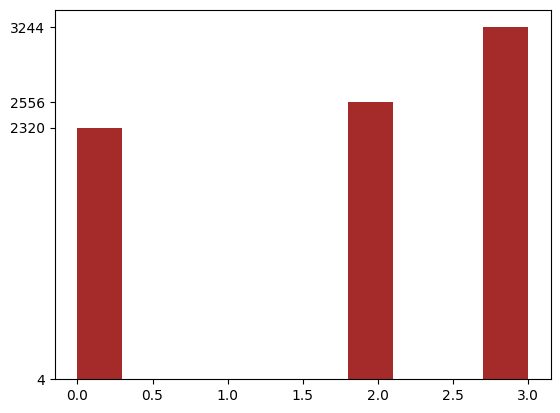

In [ ]:
f=df['cap-surface'].value_counts() #Frequency
plt.hist(data=df,x='cap-surface',color = 'brown')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

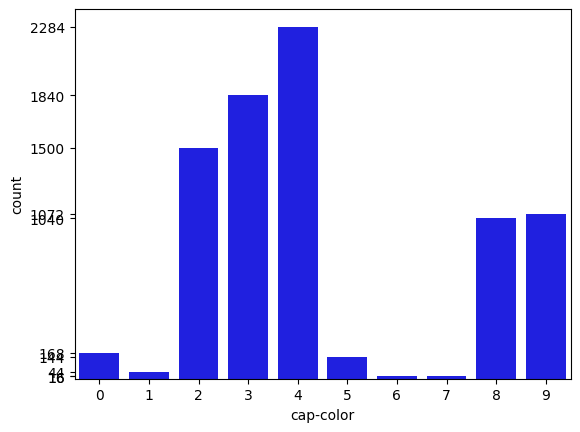

In [ ]:
f=df['cap-color'].value_counts() #Frequency
sb.countplot(data=df,x='cap-color',color = 'Blue')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

In [ ]:
df['bruises'].value_counts()

,count
bruises,
0,4748
1,3376


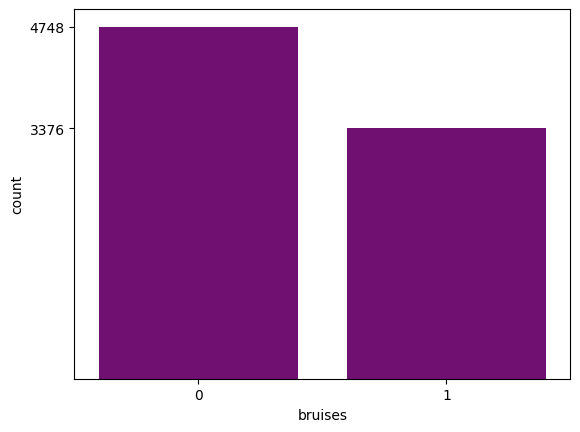

In [ ]:
f=df['bruises'].value_counts() #Frequency
sb.countplot(data=df,x='bruises',color = 'purple')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

In [ ]:
df['odor'].value_counts()

,count
odor,
5,3528
2,2160
8,576
7,576
0,400
3,400
6,256
1,192
4,36


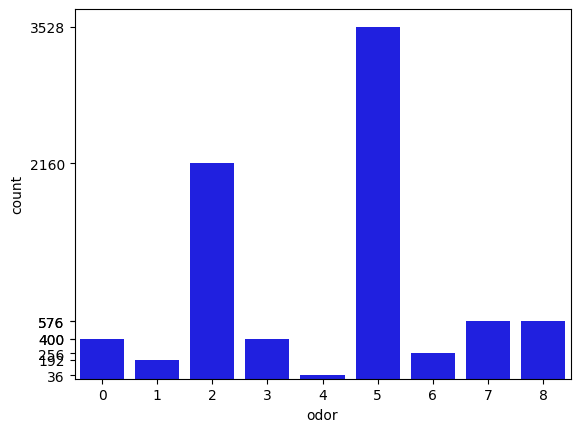

In [ ]:
f=df['odor'].value_counts() #Frequency
sb.countplot(data=df,x='odor',color = 'Blue')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

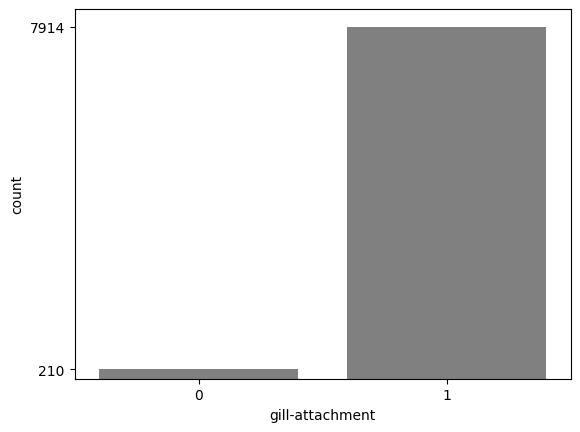

In [ ]:
f=df['gill-attachment'].value_counts() #Frequency
sb.countplot(data=df,x='gill-attachment',color = 'Grey')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

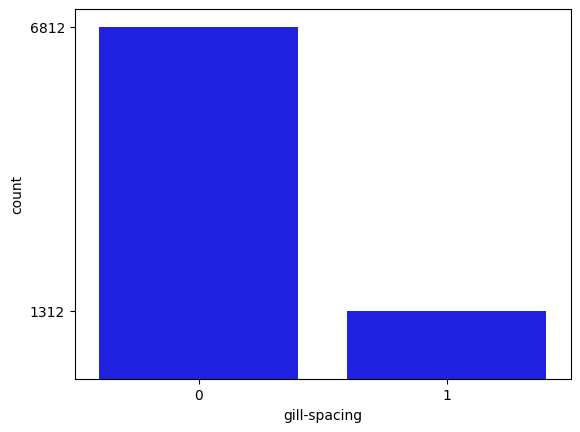

In [ ]:
f=df['gill-spacing'].value_counts() #Frequency
sb.countplot(data=df,x='gill-spacing',color = 'Blue')
#ticks is inbuild function of matplotlib library
plt.yticks(f)
plt.show()

In [ ]:
df.shape

(8124, 23)

# Feature Scaling
To to convert unit type of the data

In [ ]:
#Apply Scaling on Input Column Of Both X_train and X_test
#use StandardScaler Class
from sklearn.preprocessing import StandardScaler
#Object
ss=StandardScaler()

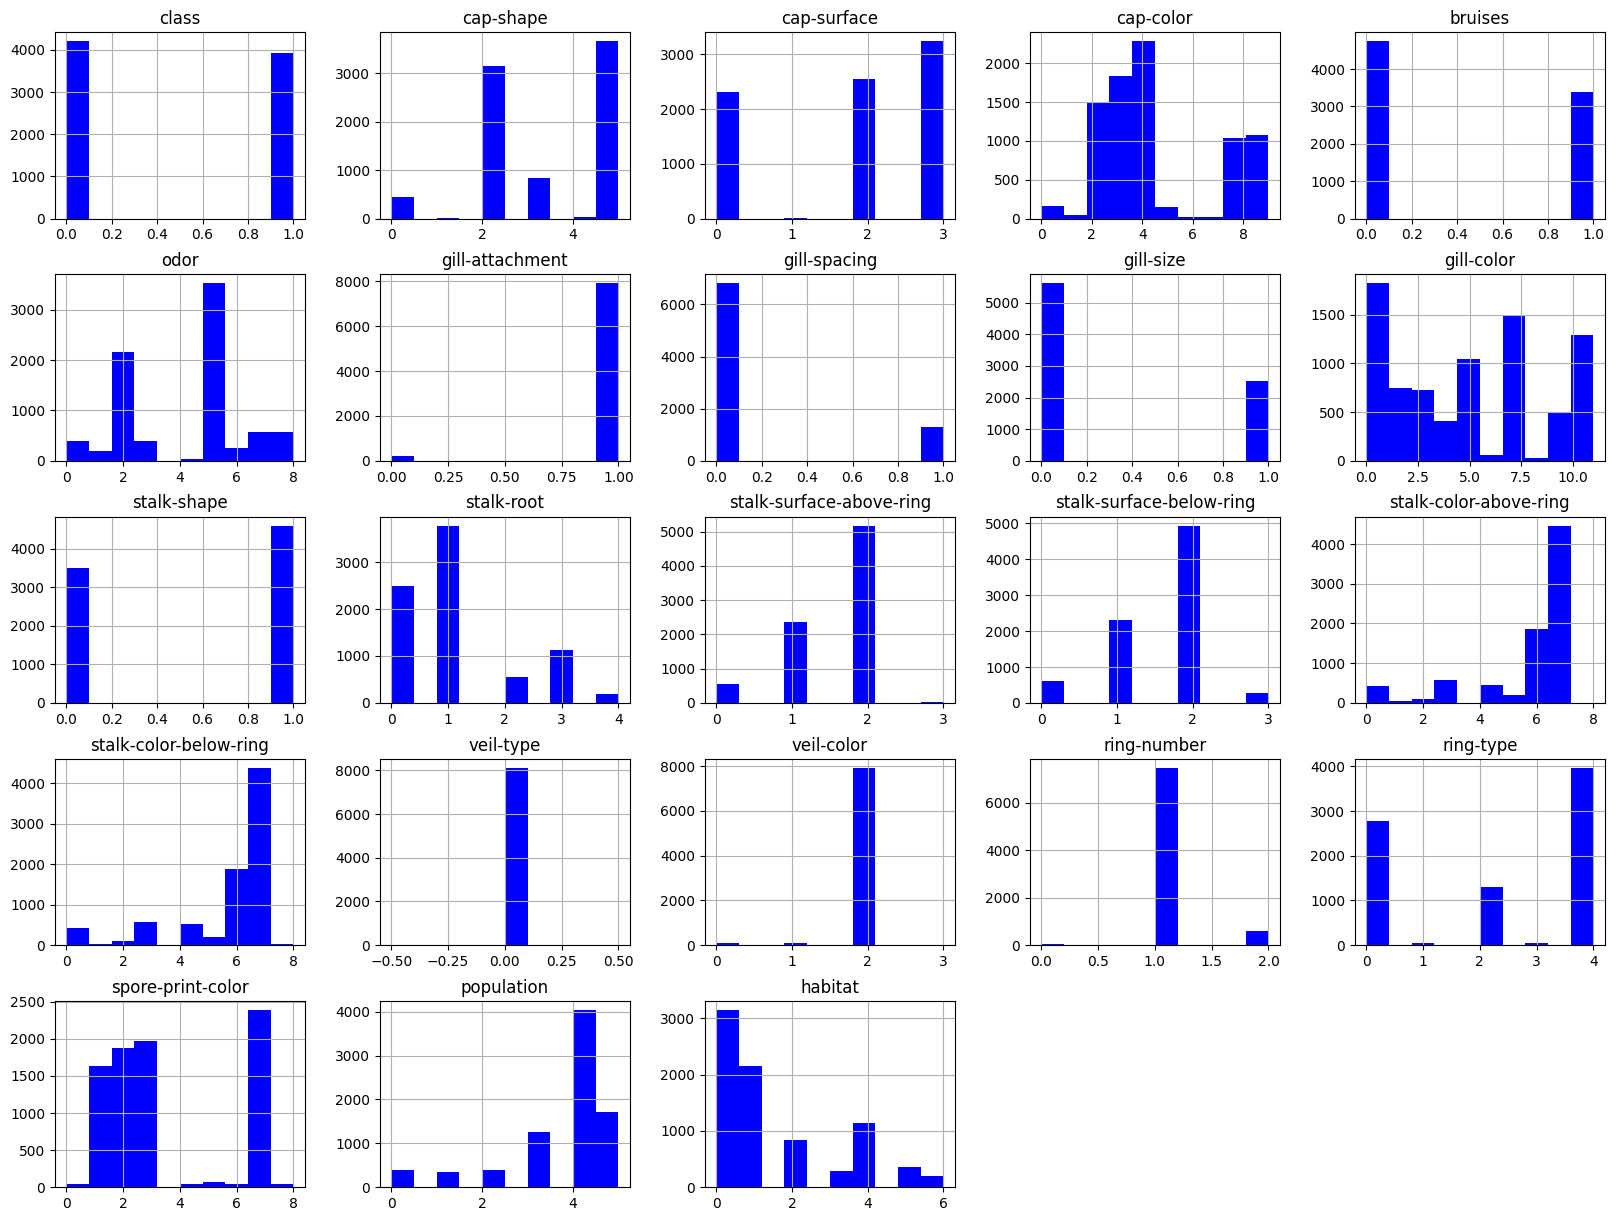

In [ ]:
# VISUALIZING THE WHOLE DATAFRAME BY PLOTTING HISTOGRAM
df.hist(bins = 10, figsize = (20,15), color='blue')
plt.show()

# Split Data into training and testing part

In [ ]:
#Seprate Input and Output from given dataset
X=df.drop('class',axis=1)
Y=df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.03,random_state=1)


# Data Modeling

In [ ]:
#Create User Defined Function
def create_model(model):
    model.fit(X_train,Y_train) #Train The Model With 70% of data
    #Test The Model with 30% data
    Y_pred=model.predict(X_test)
    #Print Confusion Matrix
    print(confusion_matrix(Y_test,Y_pred))
    #generate classification report
    print(classification_report(Y_test,Y_pred))
    return model

In [ ]:
#Perform The Model With The Help Of Logistic Regression (Type of Classification Algorithm)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# LogisticRegression

In [ ]:
#Call LogisticRegression Inbuild Class
from sklearn.linear_model import LogisticRegression
#Create Class Object
lor=LogisticRegression()

In [ ]:
#Call The Function
lor=create_model(lor)

[[119   3]
 [  7 115]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.97      0.94      0.96       122

    accuracy                           0.96       244
   macro avg       0.96      0.96      0.96       244
weighted avg       0.96      0.96      0.96       244



 LogisticRegression <br>
Accuracy  = 0.96     <br>
Recall = 0.98



# DecisionTreeClassifier

In [ ]:
#classification algorithm : DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)
#call user defined function
dtc=create_model(dtc)

[[122   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       122

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



### Information Gain Values

In [ ]:
dict={'Inupt Collumns':X.columns, 'IG':dtc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)

,Inupt Collumns,IG
0,gill-color,0.340310
1,spore-print-color,0.199734
2,population,0.183321
3,gill-size,0.128100
4,odor,0.036670
5,bruises,0.029549
6,stalk-shape,0.025080
7,habitat,0.018513
8,stalk-color-below-ring,0.017107
9,stalk-root,0.011987


# Visualizing Decision Tree

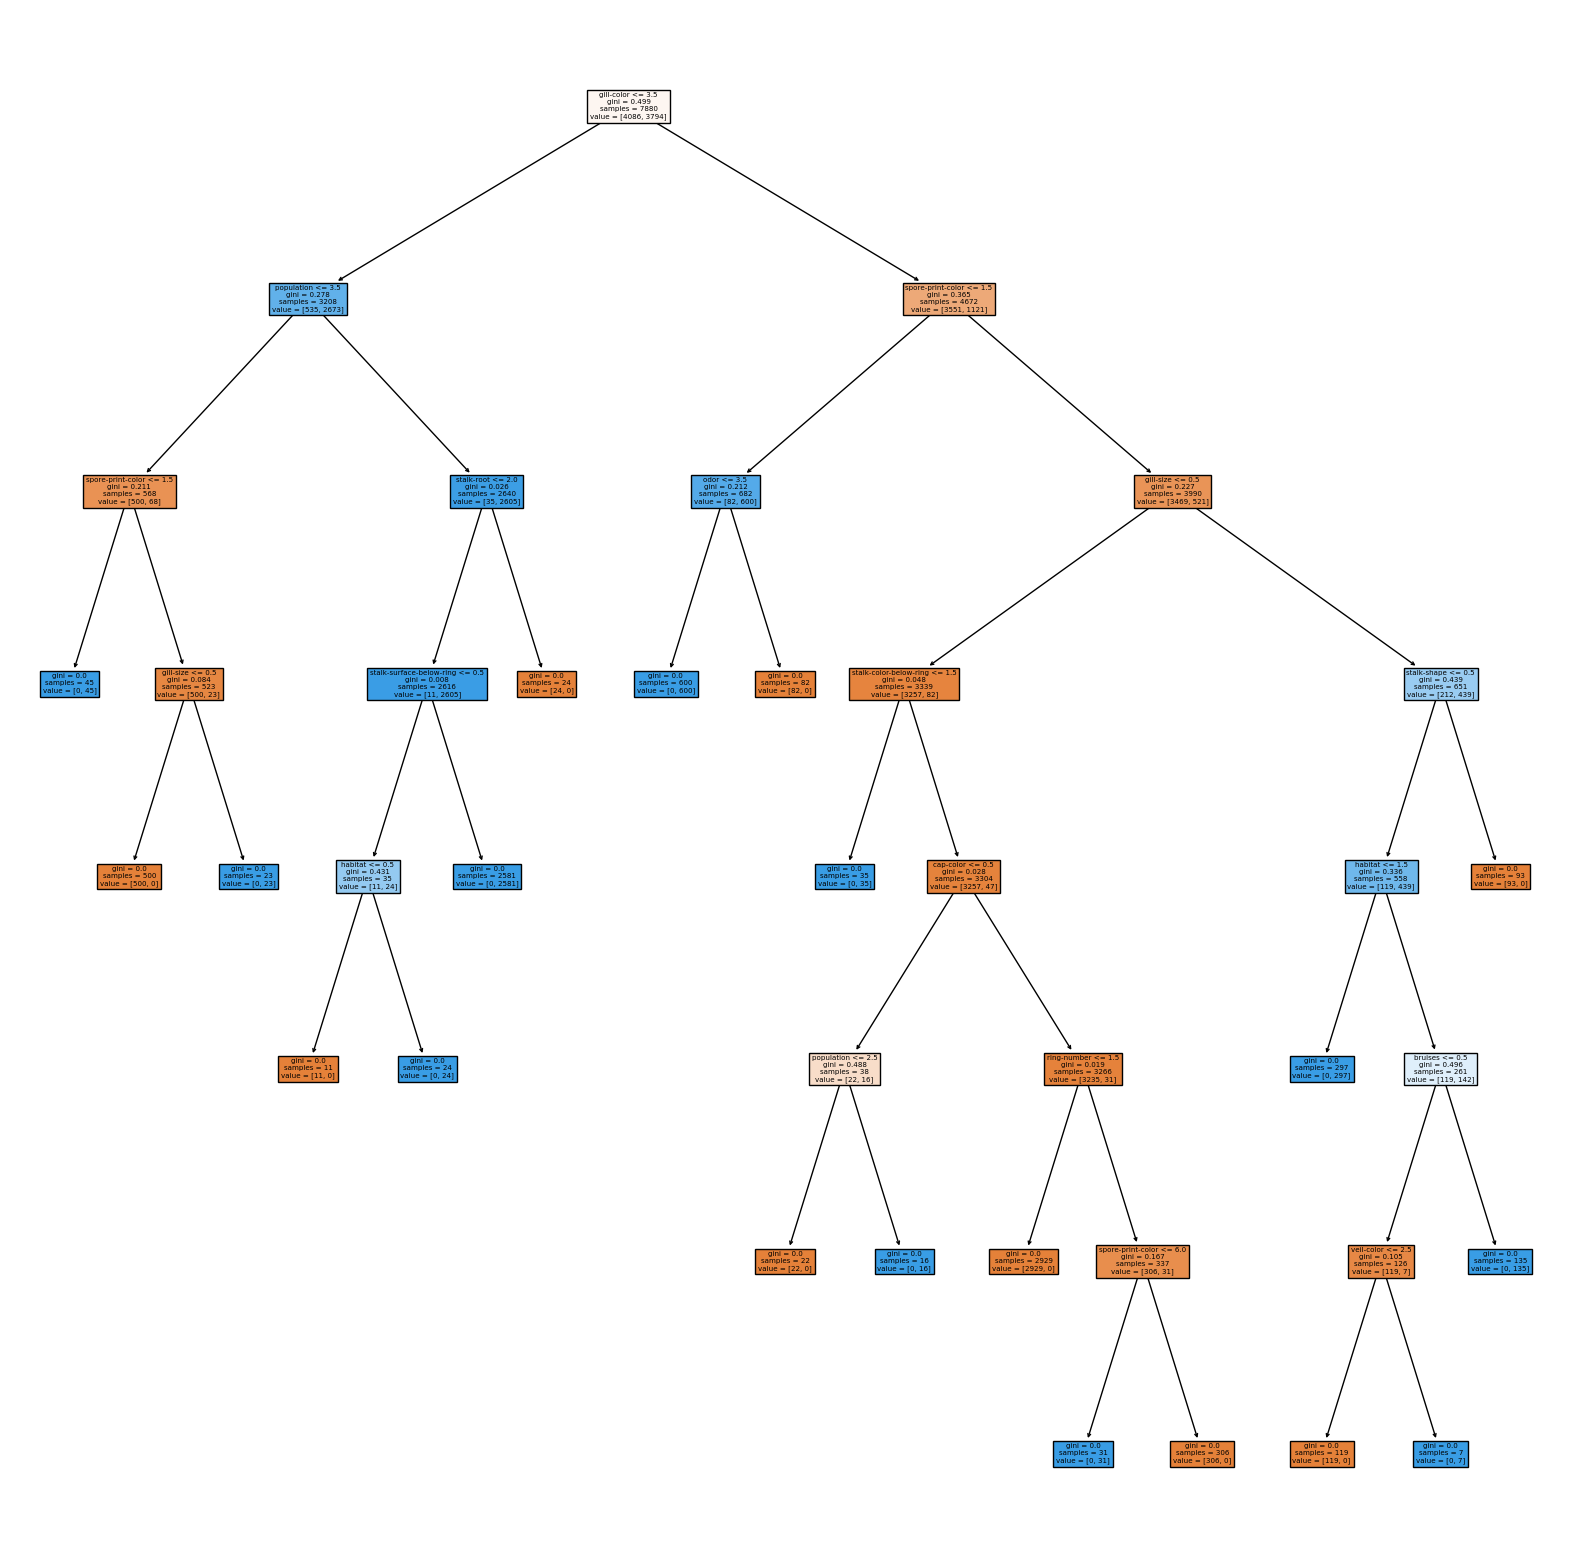

In [ ]:
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,20))
_=tree.plot_tree(dtc,feature_names=features,filled=True)

# Ensembling Technique

## 1.BootStraping method:
### RandomForestTree(use Bagging):


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report as cr


In [ ]:
"""for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print("No of Estimators means no of Decision Tree",i)
    rfc=create_model(rfc)"""

'for i in range(10,101):\n    rfc=RandomForestClassifier(n_estimators=i,random_state=1)\n    print("No of Estimators means no of Decision Tree",i)\n    rfc=create_model(rfc)'

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,random_state=1)
rfc=create_model(rfc)

[[122   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       122

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



In [ ]:
## create a dataframe
dict={"input columns": X.columns, "IG": rfc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,gill-color,0.137203
1,gill-size,0.111830
2,spore-print-color,0.110369
3,population,0.096892
4,ring-type,0.096744
5,stalk-surface-above-ring,0.082442
6,odor,0.060720
7,stalk-surface-below-ring,0.059342
8,stalk-root,0.057392
9,stalk-color-above-ring,0.042816


# Boosting
## ADA Boost


In [ ]:

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
"""for i in range(1,23):
    #create the object of class AdaBoostClassifier
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of Estimator :",i)

    #call user defined function
    ada=create_model(ada)"""

'for i in range(1,23):\n    #create the object of class AdaBoostClassifier\n    ada=AdaBoostClassifier(n_estimators=i,random_state=1)\n    print("No of Estimator :",i)\n\n    #call user defined function\n    ada=create_model(ada)'

In [ ]:
X.shape

(8124, 22)

In [ ]:
ada=AdaBoostClassifier(n_estimators=13,random_state=1)
#call user defined function
ada=create_model(ada)

[[122   0]
 [  1 121]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      1.00       122

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



In [ ]:
#create a dataframe
dict={"input columns": X.columns, "IG": ada.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,odor,0.307692
1,spore-print-color,0.153846
2,stalk-surface-above-ring,0.076923
3,cap-color,0.076923
4,gill-spacing,0.076923
5,gill-size,0.076923
6,gill-color,0.076923
7,stalk-root,0.076923
8,stalk-surface-below-ring,0.076923
9,veil-type,0.000000


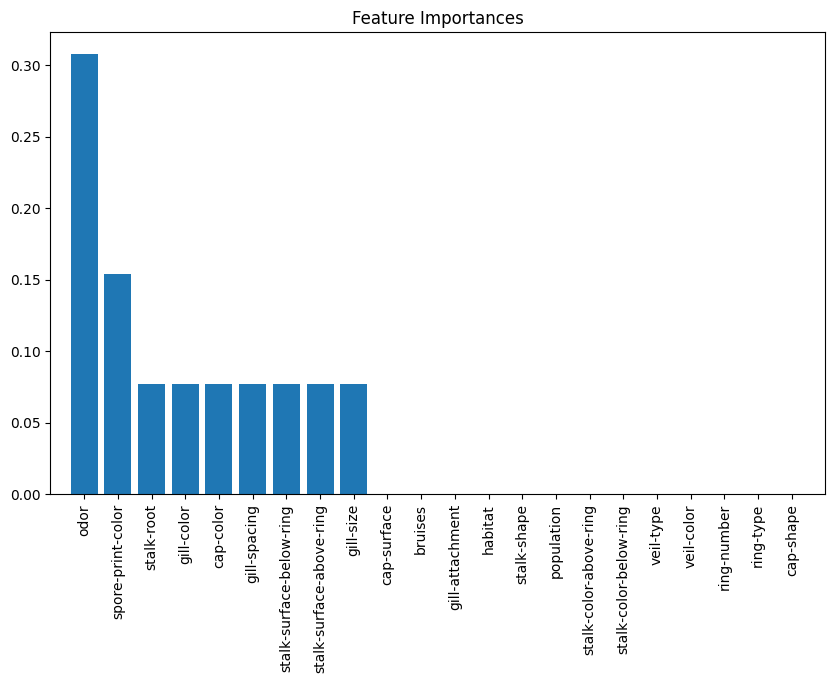

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from AdaBoostClassifier
importances = ada.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


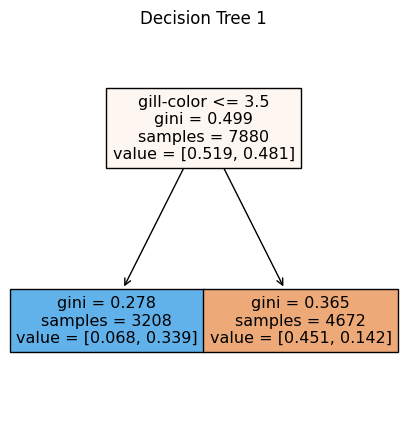

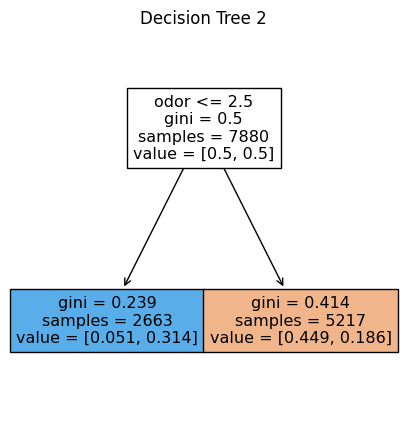

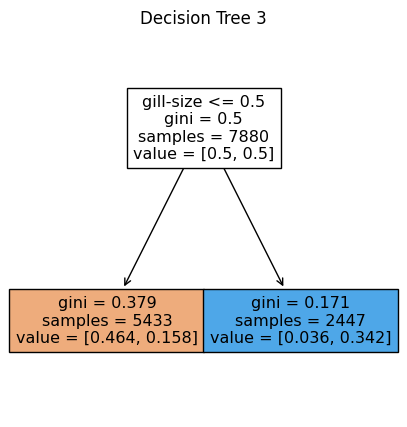

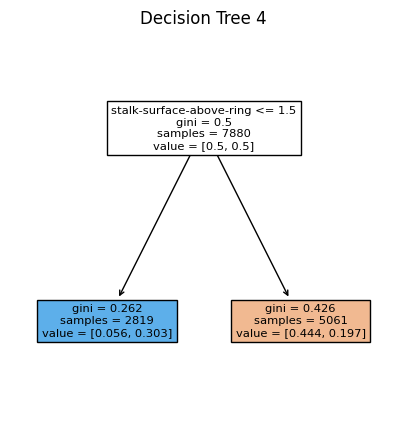

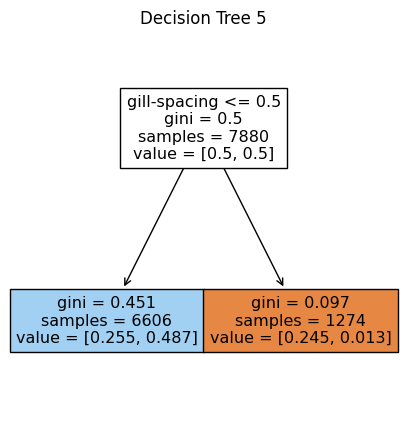

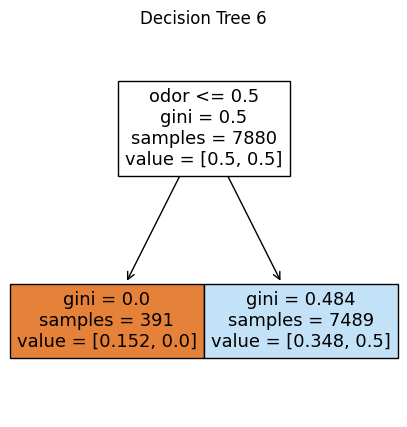

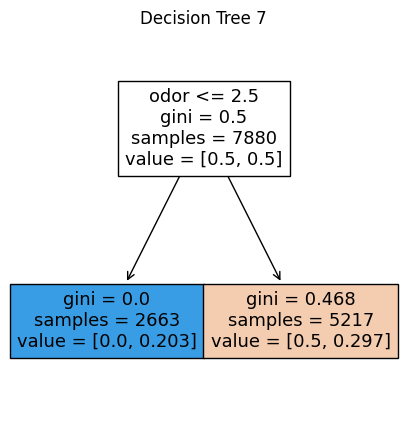

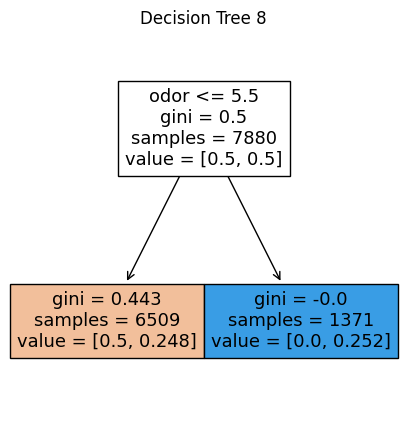

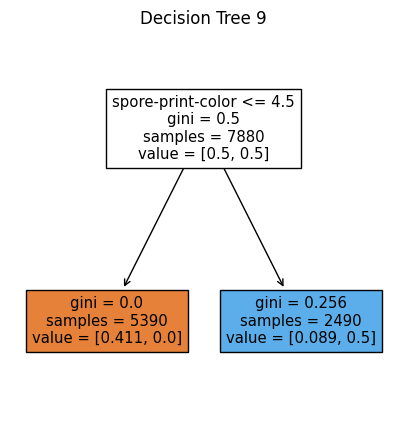

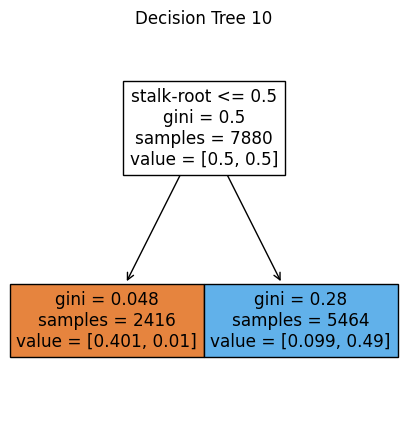

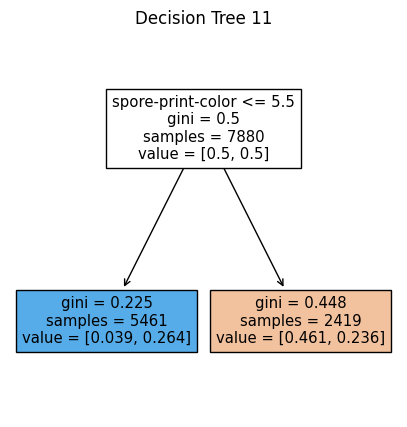

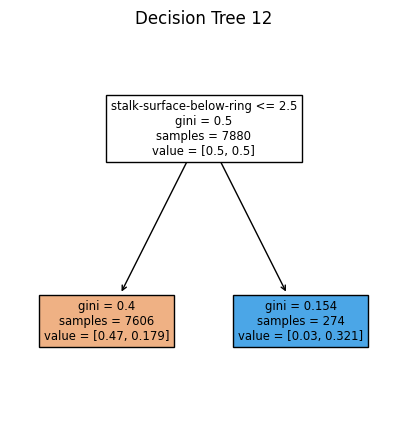

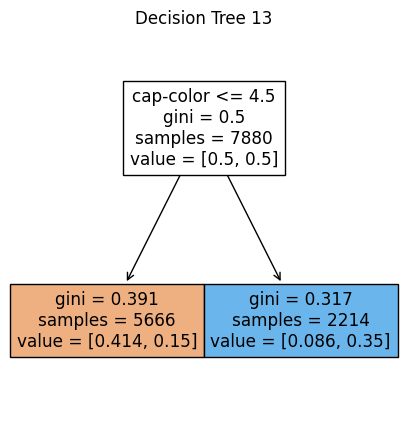

In [ ]:
from sklearn.tree import plot_tree

n_trees = len(ada.estimators_)
features = X.columns

for i, tree in enumerate(ada.estimators_):
    plt.figure(figsize=(5, 5))
    plot_tree(tree, feature_names=features, filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

# Gradient Boosting (GB)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
"""for i in range(10,101):
    #create the object of class GradientBoostingClassifier
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of Estimator :",i)

    #call user defined function
    gbc=create_model(gbc)"""

'for i in range(10,101):\n    #create the object of class GradientBoostingClassifier\n    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)\n    print("No of Estimator :",i)\n\n    #call user defined function\n    gbc=create_model(gbc)'

In [ ]:
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)
#call user defined function
gbc=create_model(gbc)

[[121   1]
 [  6 116]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       122
           1       0.99      0.95      0.97       122

    accuracy                           0.97       244
   macro avg       0.97      0.97      0.97       244
weighted avg       0.97      0.97      0.97       244



In [ ]:
#create a dataframe
dict={"input columns": X.columns, "IG": gbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,gill-color,0.363436
1,spore-print-color,0.197864
2,population,0.190581
3,odor,0.109224
4,gill-size,0.093164
5,stalk-root,0.035667
6,stalk-color-above-ring,0.004049
7,habitat,0.003564
8,stalk-surface-below-ring,0.002451
9,stalk-color-below-ring,0.000000


#Extreme Gradient Boost


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
"""for i in range(10,101):
    #create the object of class XGBClassifier
    xgbc=XGBClassifier(n_estimators=i,random_state=1)
    print("No of Estimator :",i)

    #call user defined function
    xgbc=create_model(xgbc)"""

'for i in range(10,101):\n    #create the object of class XGBClassifier\n    xgbc=XGBClassifier(n_estimators=i,random_state=1)\n    print("No of Estimator :",i)\n\n    #call user defined function\n    xgbc=create_model(xgbc)'

In [ ]:
#create the object of class XGBClassifier
xgbc=XGBClassifier(n_estimators=10,random_state=1)
#call user defined function
xgbc=create_model(xgbc)

[[122   0]
 [  0 122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       122

    accuracy                           1.00       244
   macro avg       1.00      1.00      1.00       244
weighted avg       1.00      1.00      1.00       244



In [ ]:
#create a dataframe
dict={"input columns": X.columns, "IG": xgbc.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by="IG", ascending=False, ignore_index=True)

,input columns,IG
0,gill-color,0.415690
1,population,0.180643
2,spore-print-color,0.095882
3,gill-size,0.089376
4,bruises,0.061763
5,stalk-shape,0.037116
6,odor,0.029952
7,habitat,0.022888
8,stalk-color-above-ring,0.022095
9,stalk-root,0.014414


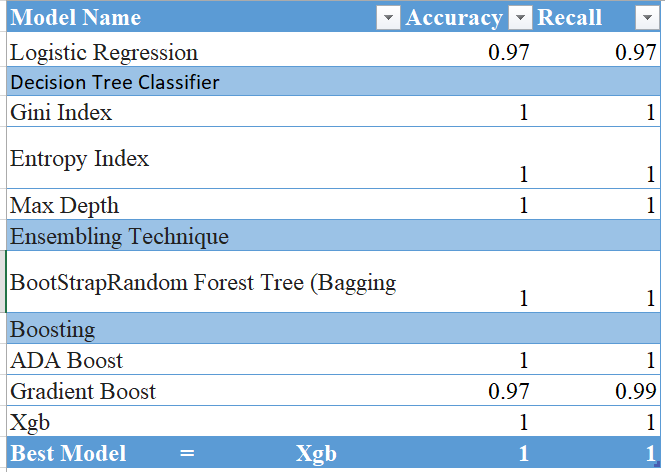

1- XGBoost achieved the highest accuracy and recall rates, indicating it is the most effective model for this classification task. <br>
2- Random Forest also performed very well and is a close contender.<br>
3- Logistic Regression, while simpler, had the lowest performance among the models tested.<br>

XGBoost is the most accurate and had the highest recall rate, making it the best model for classifying mushrooms as edible or poisonous. <br><br>
XGBoost achieved the highest accuracy and recall, making it the most effective model for this task.